In [38]:
import os
import sys
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(1, os.path.join(sys.path[0], '..'))

from scheduler.plot import Plot
from scheduler.parser import parse_arguments

"""This class loads data saved from simulations and presents it again. 
"""

'This class loads data saved from simulations and presents it again. \n'

In [39]:
filenames=[
    "2022-07-27_052241__latency_0_max_servers_10_timesteps_24",
    "2022-07-27_052241__latency_25_max_servers_10_timesteps_24",
    "2022-07-27_052241__latency_50_max_servers_10_timesteps_24",
]   
conf = parse_arguments(["-m", "-1", "-l", "-1", "-c", "-1"])
dfs = [pd.read_csv(f"../saved/{name}.csv") for name in filenames]
dfs_grouped_by_timestep = [df.groupby("timestep") for df in dfs]

In [40]:
plot = Plot(conf)
plot.plot(df=dfs[0])

AttributeError: 'Plot' object has no attribute 'save_cumulative_latency'

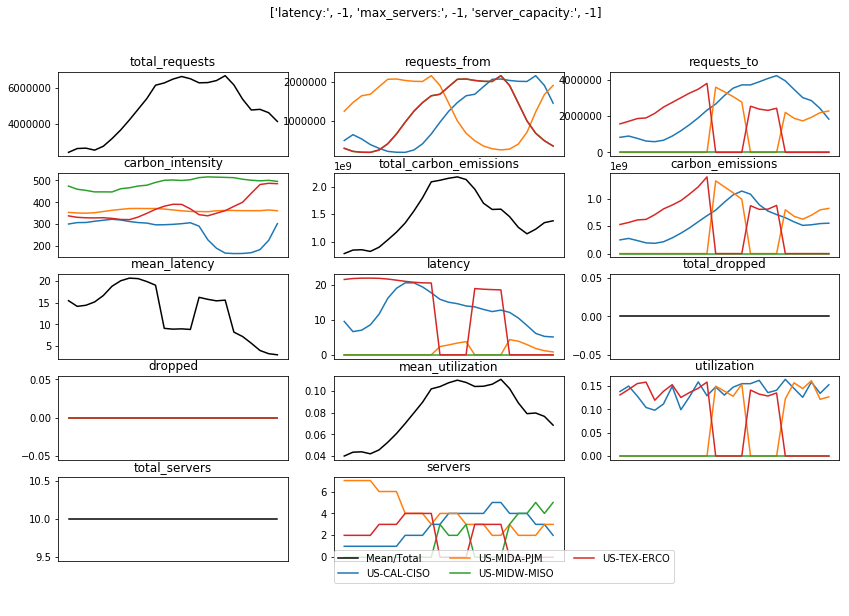

In [ ]:
plot.plot(df=dfs[1])

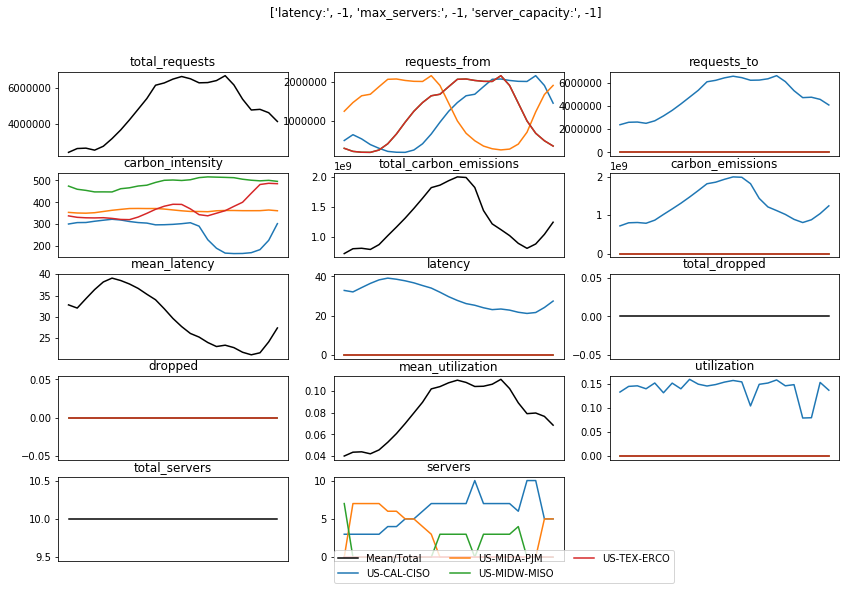

In [ ]:
plot.plot(df=dfs[2])

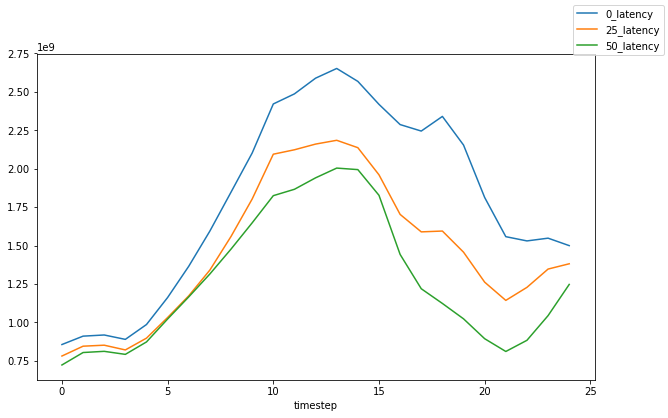

In [ ]:
ax = None
fig = plt.figure(figsize=(10,6))
for df in dfs_grouped_by_timestep:
    ax = df["total_carbon_emissions"].sum().plot(ax=ax)
fig.legend(["0_latency", "25_latency", "50_latency"]);

c:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


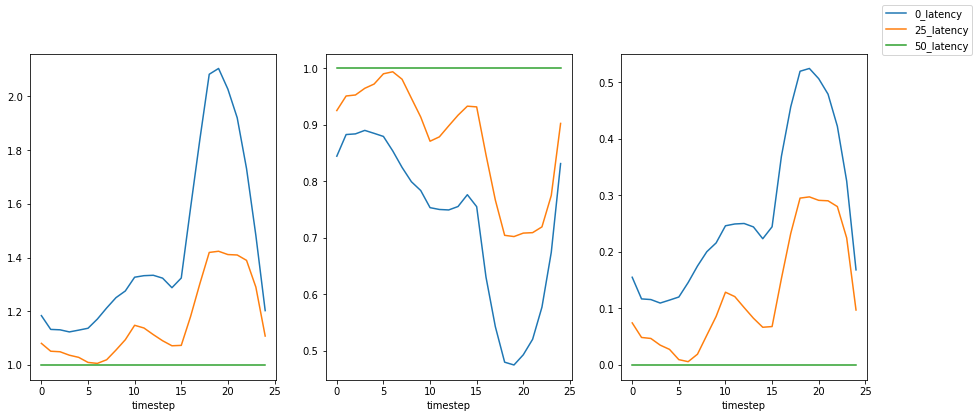

In [ ]:
ax = None
fig = plt.figure(figsize=(15, 6))
factor = dfs_grouped_by_timestep[2]["total_carbon_emissions"].sum()
for df in dfs_grouped_by_timestep:
    ax = plt.subplot(1, 3, 1)
    p = df["total_carbon_emissions"].sum() / factor
    ax = p.plot(ax=ax)
    ax = plt.subplot(1, 3, 2)
    p =  factor / df["total_carbon_emissions"].sum()
    ax = p.plot(ax=ax)
    ax = plt.subplot(1, 3, 3)
    p =  1 - factor / df["total_carbon_emissions"].sum()
    ax = p.plot(ax=ax)

fig.legend(["0_latency", "25_latency", "50_latency"]);

[0.26805708]
[0.12549361]
[0.]


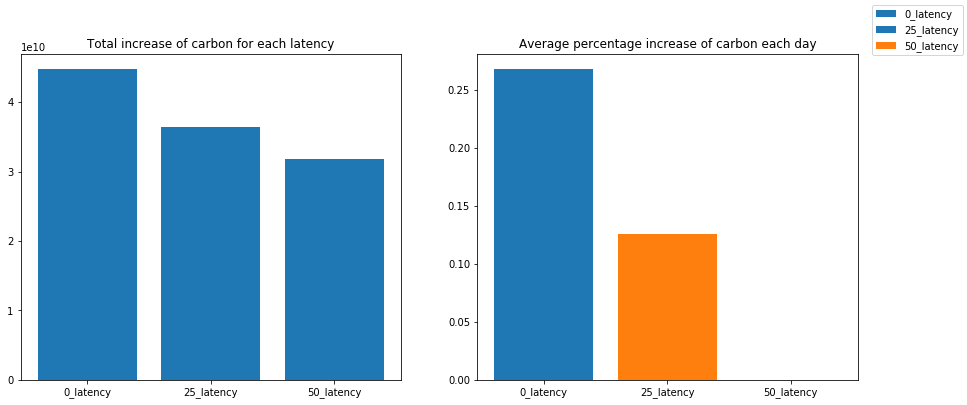

In [ ]:
"""This is important to show the marginal save of carbon between different constraints
    latency. NOTE that this latency constraints is what controls how much we are willing
    to outsource to other regions, and thus controls the amount of carbon we \textit{can} save
"""


#print(dfs)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

latencies = ["0_latency", "25_latency", "50_latency"]
carbon_emission_sums = []
for df in dfs_grouped_by_timestep:
    carbon_emission_sums.append(df["total_carbon_emissions"].sum().sum())
ax1.bar(["0_latency", "25_latency", "50_latency"], carbon_emission_sums)

factor = dfs_grouped_by_timestep[2]["total_carbon_emissions"].sum()

percentages = [[],[],[]]
for i, df in enumerate(dfs_grouped_by_timestep):
    p =  1 - factor / df["total_carbon_emissions"].sum()
    percentages[i].append(p)
#means = np.mean(percentages, axis=1)
latencies = ["0_latency", "25_latency", "50_latency"]
for percentage, latency_lbl in zip(percentages, latencies): 
    mean = np.mean(percentage, axis=1)
    print(mean)
    ax2.bar(latency_lbl, mean)
#np.mean(percentages[i])

ax1.set_title("Total increase of carbon for each latency")
ax2.set_title("Average percentage increase of carbon each day")
fig.legend(["0_latency", "25_latency", "50_latency"]);